In [1]:
# import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

import warnings
warnings.filterwarnings('ignore')

In [3]:
# assigning train and test directories
train_dir = "C:\\Users\\groom\\Documents\\Data101\\dogs\\train"
test_dir = "C:\\Users\\groom\\Documents\\Data101\\dogs\\test\\unknown"

In [4]:
# train and test sizes are the length of their respective directories
train_size = len(os.listdir("C:\\Users\\groom\\Documents\\Data101\\dogs\\train"))
test_size = len(os.listdir("C:\\Users\\groom\\Documents\\Data101\\dogs\\test\\unknown"))

train_size, test_size

(10222, 10357)

In [83]:
# importing labels csv file
df = pd.read_csv('labels.csv') # https://www.kaggle.com/c/dog-breed-identification
df.head(15)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [6]:
dog_breeds = sorted(df['breed'].unique())
n_classes = len(dog_breeds)
print(n_classes)
dog_breeds

120


['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [67]:
#Create list of alphabetically sorted labels.
classes = sorted(list(set(df['breed'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))



#Map each label string to an integer label.
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num

Total unique breed 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

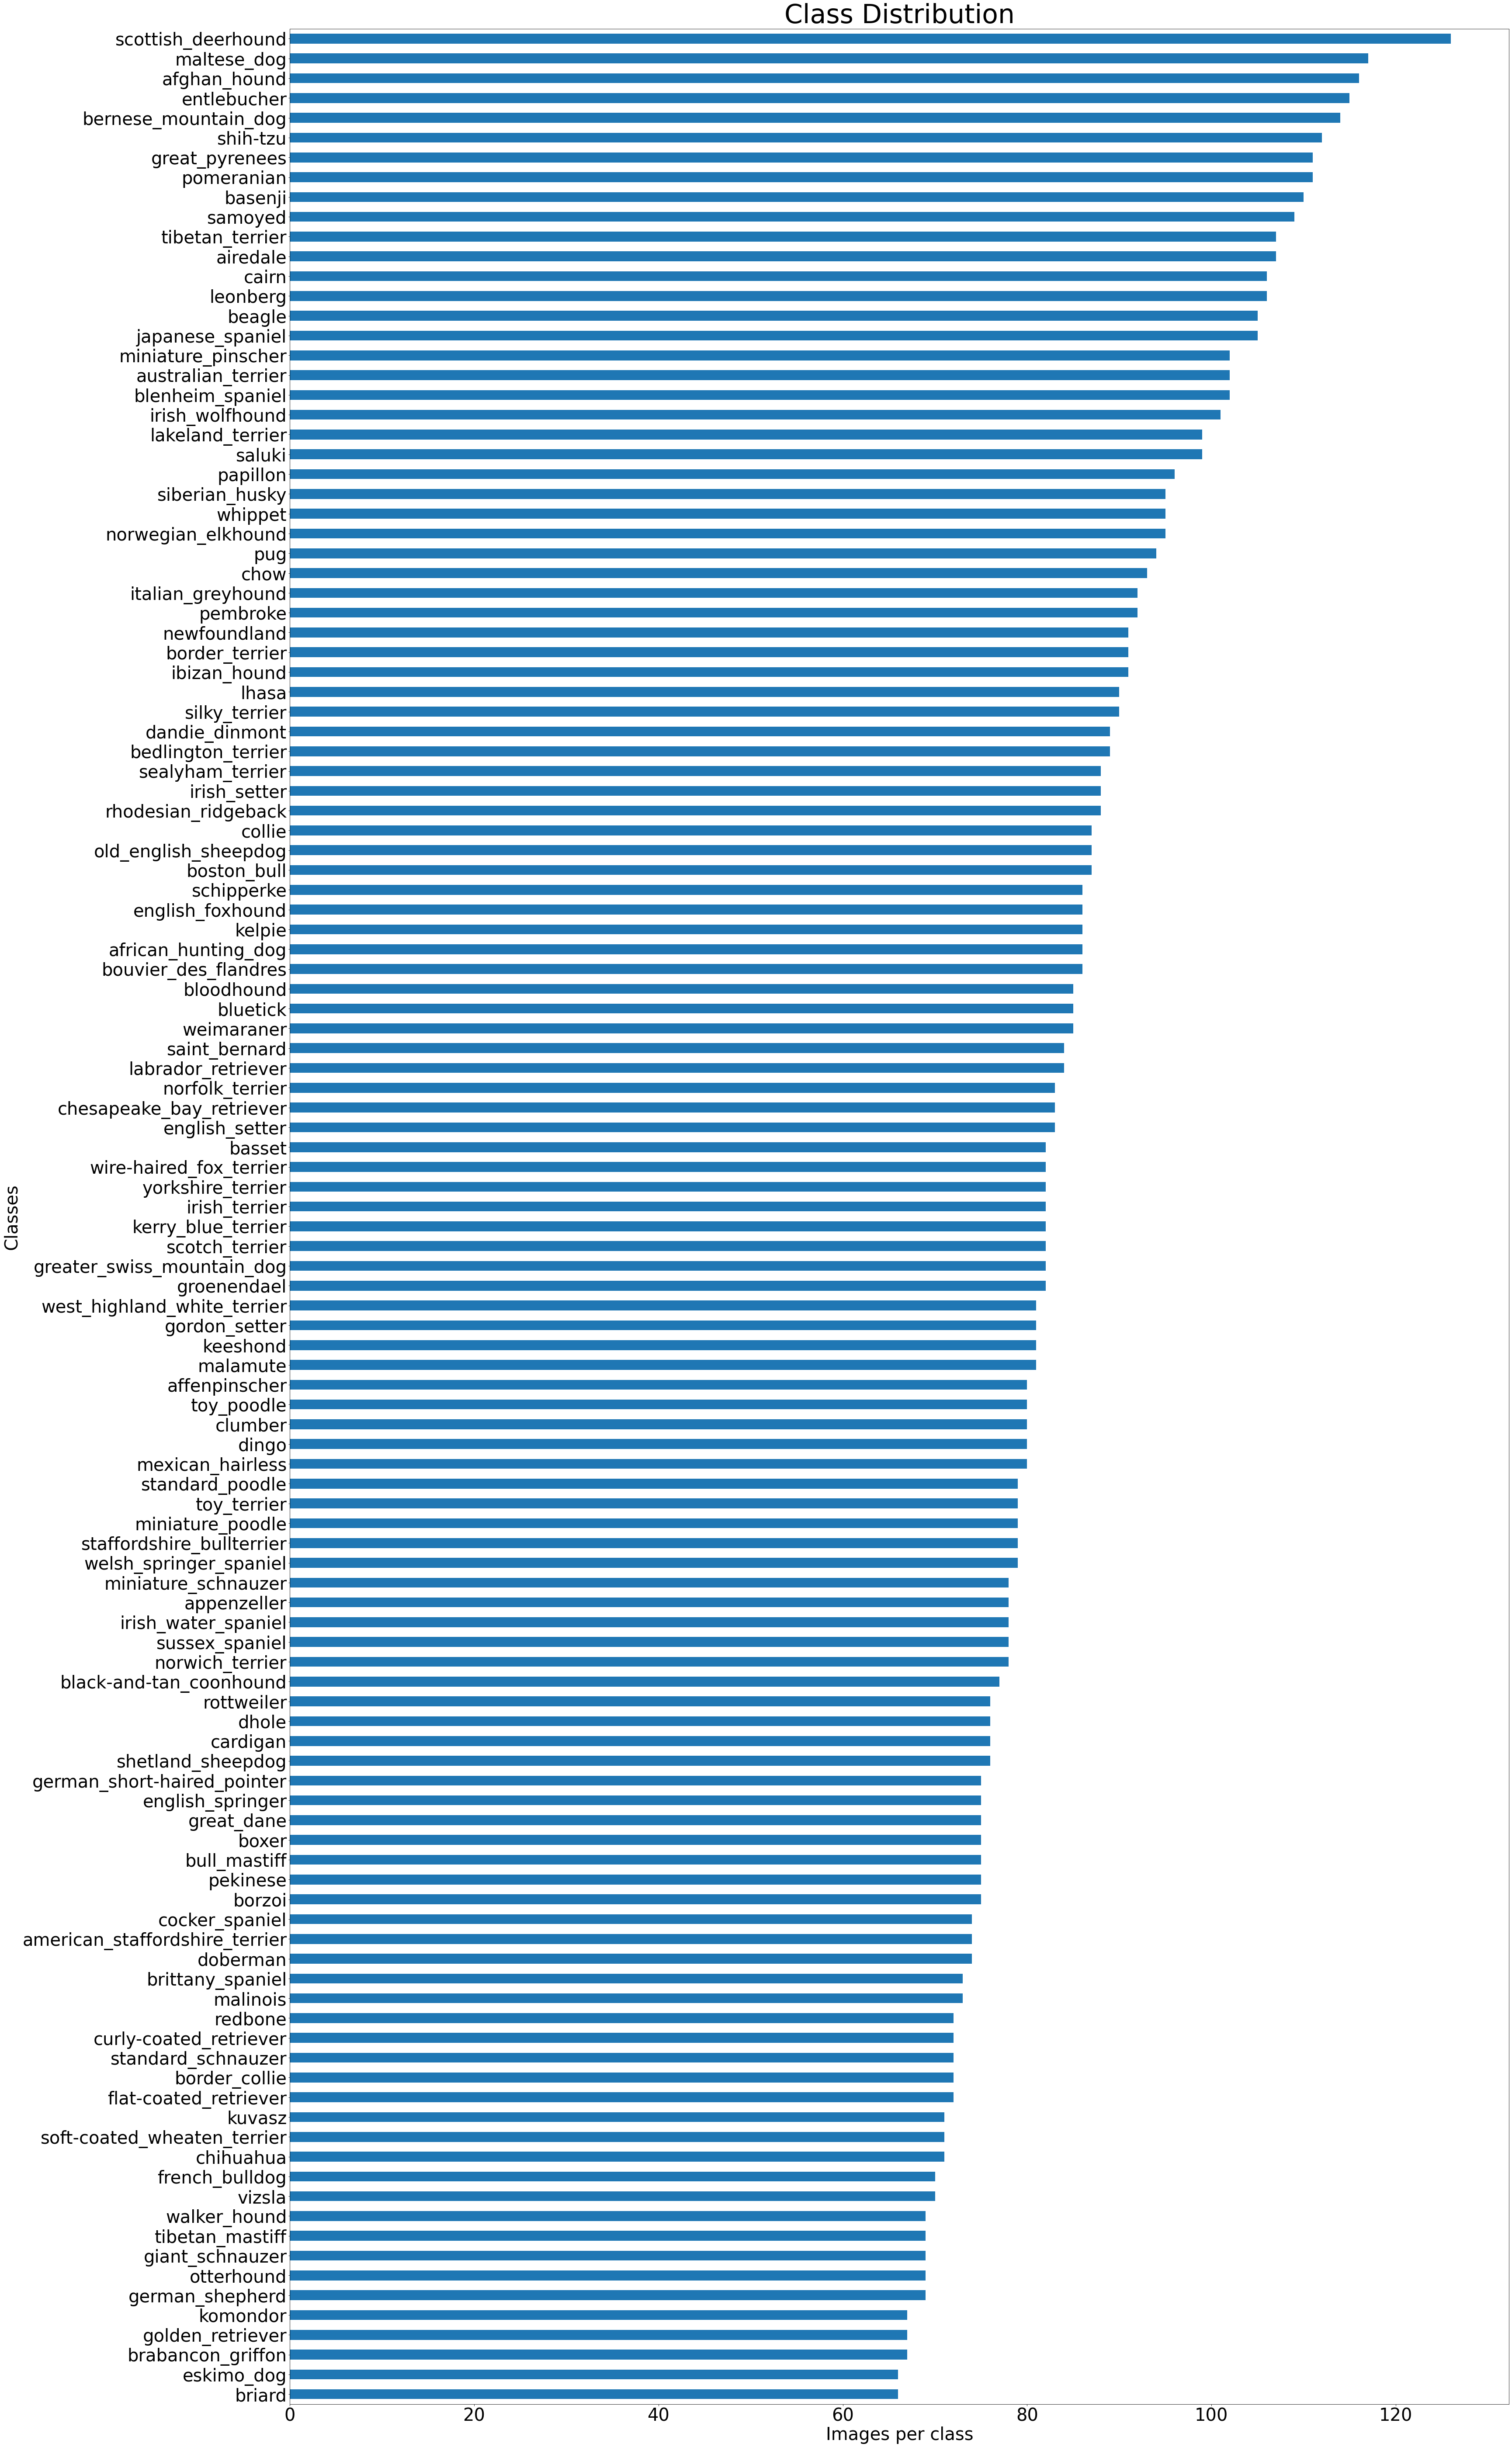

In [7]:
# Breed Distribution
ax=pd.value_counts(df['breed'],ascending=True).plot(kind='barh',fontsize="40",title="Class Distribution",figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)
plt.show()

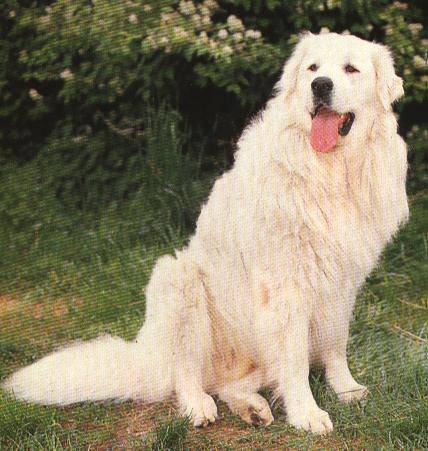

In [14]:
# displaying one image

from IPython.display import display, Image
Image("C:\\Users\\groom\\Documents\\Data101\\dogs\\train\\0b97116ed04c8f0f7eb4a2b4b2620476.jpg")

In [15]:
# convert labels column to NumPy array
labels = df["breed"].to_numpy() 
#check the first 10 elements in the label ndarray
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [16]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [17]:
class_to_num = dict(zip(dog_breeds,range(n_classes)))

In [18]:
from keras.preprocessing.image import load_img
from keras.utils import to_categorical

def images_to_array(data_dir,df,image_size):
    image_names = df['id']
    image_labels = df['breed']
    data_size = len(image_names)
    
    X = np.zeros([data_size,image_size[0],image_size[1],image_size[2]],dtype = np.uint8)
    y = np.zeros([data_size,1],dtype = np.uint8)
    
    for i in range(data_size):
        img_name = image_names[i]
        img_dir = os.path.join(data_dir,img_name+'.jpg')
        img_pixels = load_img(img_dir,target_size=image_size)
        X[i] = img_pixels
        y[i] = class_to_num[image_labels[i]]
        
    y = to_categorical(y)
    
    ind = np.random.permutation(data_size)
    X = X[ind]
    y = y[ind]
    print('Ouptut Data Size: ', X.shape)
    print('Ouptut Label Size: ', y.shape)
    return X, y  

Using TensorFlow backend.


In [19]:
img_size = (299,299,3)

In [20]:
X, y = images_to_array(train_dir,df,img_size)

Ouptut Data Size:  (10222, 299, 299, 3)
Ouptut Label Size:  (10222, 120)


In [21]:
#Function to extract features from images
from keras.models import Model
from keras.layers import BatchNormalization, Dense, GlobalAveragePooling2D,Lambda, Dropout, InputLayer, Input

def get_features(model_name, data_preprocessor, input_size, data):
    #Prepare pipeline.
    input_layer = Input(input_size)
    preprocessor = Lambda(data_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)
    #Extract feature.
    feature_maps = feature_extractor.predict(data, batch_size=32, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [22]:
#Extracting features using InceptionV3
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X)




10222/10222 [==============================] - 2890s 283ms/step
Feature maps shape:  (10222, 2048)


In [23]:
#Extracting features using Xception
from keras.applications.xception import Xception, preprocess_input
xception_preprocessor = preprocess_input
xception_features = get_features(Xception,
                                 xception_preprocessor,
                                 img_size, X)

10222/10222 [==============================] - 5829s 570ms/step
Feature maps shape:  (10222, 2048)


In [24]:
#Extracting features using InceptionResnetV2
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
inc_resnet_preprocessor = preprocess_input
inc_resnet_features = get_features(InceptionResNetV2,
                                   inc_resnet_preprocessor,
                                   img_size, X)

10222/10222 [==============================] - 5601s 548ms/step
Feature maps shape:  (10222, 1536)


In [26]:
#concatinating all extracted features
final_features = np.concatenate([inception_features,
                                 xception_features,
                                 inc_resnet_features,], axis=-1)
print('Final feature maps shape', final_features.shape)

Final feature maps shape (10222, 5632)


In [27]:
# freeing up memory
del X

In [28]:
#Callbacks
from keras.callbacks import EarlyStopping
EarlyStop_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
my_callback=[EarlyStop_callback]

In [100]:
#Building Model
from keras.models import Sequential
model = Sequential()
model.add(InputLayer(final_features.shape[1:]))
model.add(Dropout(0.7))
model.add(Dense(120,activation='softmax'))

In [101]:
#visual summary of layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 5632)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               675960    
Total params: 675,960
Trainable params: 675,960
Non-trainable params: 0
_________________________________________________________________


In [31]:
#Compiling Model
model.compile(optimizer='adam', #stochastic gradient descent method based on adaptive estimation of first-order and second-order moments.
            loss='categorical_crossentropy', # loss function that is used in multi-class classification tasks. 
            metrics=['accuracy'])

In [32]:
#Training Model no callbacks
history = model.fit(final_features,
                  y,
                  batch_size=32,
                  epochs=50,
                  validation_split=0.1,)
                  #callbacks=my_callback)

Train on 9199 samples, validate on 1023 samples
Epoch 1/50
9199/9199 [==============================] - 10s 1ms/step - loss: 0.8557 - accuracy: 0.8007 - val_loss: 0.2926 - val_accuracy: 0.9130
Epoch 2/50
9199/9199 [==============================] - 6s 658us/step - loss: 0.2762 - accuracy: 0.9131 - val_loss: 0.2841 - val_accuracy: 0.9101
Epoch 3/50
9199/9199 [==============================] - 6s 660us/step - loss: 0.2123 - accuracy: 0.9303 - val_loss: 0.2576 - val_accuracy: 0.9267
Epoch 4/50
9199/9199 [==============================] - 6s 658us/step - loss: 0.1850 - accuracy: 0.9393 - val_loss: 0.2855 - val_accuracy: 0.9110
Epoch 5/50
9199/9199 [==============================] - 6s 662us/step - loss: 0.1583 - accuracy: 0.9441 - val_loss: 0.2946 - val_accuracy: 0.9140
Epoch 6/50
9199/9199 [==============================] - 6s 659us/step - loss: 0.1410 - accuracy: 0.9531 - val_loss: 0.3211 - val_accuracy: 0.9022
Epoch 7/50
9199/9199 [==============================] - 6s 661us/step - loss:

In [33]:
#Training Model with callbacks
history = model.fit(final_features,
                  y,
                  batch_size=32,
                  epochs=50,
                  validation_split=0.1,
                  callbacks=my_callback)

Train on 9199 samples, validate on 1023 samples
Epoch 1/50
9199/9199 [==============================] - 7s 728us/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.5226 - val_accuracy: 0.9150
Epoch 2/50
9199/9199 [==============================] - 7s 716us/step - loss: 0.0503 - accuracy: 0.9838 - val_loss: 0.5064 - val_accuracy: 0.9228
Epoch 3/50
9199/9199 [==============================] - 7s 711us/step - loss: 0.0507 - accuracy: 0.9838 - val_loss: 0.4873 - val_accuracy: 0.9198
Epoch 4/50
9199/9199 [==============================] - 7s 724us/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.5289 - val_accuracy: 0.9238
Epoch 5/50
9199/9199 [==============================] - 7s 715us/step - loss: 0.0396 - accuracy: 0.9880 - val_loss: 0.5105 - val_accuracy: 0.9208
Epoch 6/50
9199/9199 [==============================] - 7s 716us/step - loss: 0.0441 - accuracy: 0.9863 - val_loss: 0.5121 - val_accuracy: 0.9257
Epoch 7/50
9199/9199 [==============================] - 6s 705us/step - loss

In [34]:
#Converting test images to array
def images_to_array2(data_dir,df, img_size):
    images_names = df['id']
    data_size = len(images_names)
    X = np.zeros([data_size, img_size[0], img_size[1], 3], dtype=np.uint8)
    
    for i in range(data_size):
        image_name = images_names[i]
        img_dir = os.path.join(data_dir, image_name+'.jpg')
        img_pixels = load_img(img_dir, target_size=img_size)
        X[i] = img_pixels
        
    print('Ouptut Data Size: ', X.shape)
    return X

In [35]:
sample_df = pd.read_csv('sample_submission1.csv')

In [36]:
test_data = images_to_array2(test_dir, sample_df, img_size)

Ouptut Data Size:  (10357, 299, 299, 3)


In [37]:
#Extract test data features.
inception_features = get_features(InceptionV3, inception_preprocessor, img_size, test_data)

10357/10357 [==============================] - 2790s 269ms/step
Feature maps shape:  (10357, 2048)


In [38]:
#Extract test data features.
xception_features = get_features(Xception, xception_preprocessor, img_size, test_data)

10357/10357 [==============================] - 6151s 594ms/step
Feature maps shape:  (10357, 2048)


In [39]:
#Extract test data features.
inc_resnet_features = get_features(InceptionResNetV2, inc_resnet_preprocessor, img_size, test_data)

10357/10357 [==============================] - 6163s 595ms/step
Feature maps shape:  (10357, 1536)


In [40]:
# combine test features
test_features = np.concatenate([inception_features,
                                 xception_features,
                                 inc_resnet_features],axis=-1)
print('Final feature maps shape', test_features.shape)

Final feature maps shape (10357, 5632)


In [41]:
# free up memory
del test_data

In [42]:
# predicting on test features
y_pred = model.predict(test_features, batch_size=32)

In [43]:
# printing prediction array
y_pred

array([[7.46186975e-18, 4.69611307e-20, 1.18235581e-19, ...,
        2.78259482e-23, 1.33492351e-18, 2.87215193e-22],
       [7.45734954e-17, 9.85093230e-17, 2.93750166e-17, ...,
        8.08579885e-18, 3.66978189e-16, 3.77985144e-16],
       [1.07420025e-20, 1.73468468e-14, 3.01508948e-16, ...,
        2.35466391e-18, 2.22528956e-18, 5.61668044e-18],
       ...,
       [1.36683655e-17, 5.13216187e-18, 2.80857098e-13, ...,
        2.19707484e-18, 2.77569372e-15, 4.05996747e-18],
       [2.93459246e-12, 2.76785464e-15, 7.69409662e-15, ...,
        5.62617707e-16, 3.28247290e-15, 2.87312643e-12],
       [9.41516677e-15, 2.03958281e-10, 1.15792358e-11, ...,
        1.89611261e-11, 3.24595632e-17, 1.98815709e-13]], dtype=float32)

In [44]:
# prediction array shape
y_pred.shape

(10357, 120)

In [45]:
# First prediction
print(y_pred[0])
print(f"Max value (probability of prediction): {np.max(y_pred[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(y_pred[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(y_pred[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(y_pred[0])]}") # the predicted label

[7.46186975e-18 4.69611307e-20 1.18235581e-19 8.48311361e-21
 6.53227317e-22 1.34666350e-23 2.20412928e-23 2.53604821e-22
 1.98726573e-23 5.24296300e-23 2.13743430e-21 7.08131952e-19
 2.52566150e-21 2.27967023e-17 2.68193396e-22 2.61050343e-19
 3.98852016e-20 3.86146545e-24 4.48889819e-20 6.15594597e-20
 1.83583221e-23 2.62443099e-20 1.24956010e-19 6.56235934e-25
 2.71136597e-21 4.14685876e-24 1.20212603e-26 2.61232985e-24
 5.45002779e-24 1.90953546e-19 1.14827482e-21 1.00330263e-20
 4.08606575e-20 1.38152188e-21 1.53812061e-22 9.86389827e-26
 1.22853608e-20 6.88466043e-20 2.09143932e-18 1.29339205e-20
 3.42144878e-23 1.25717468e-22 2.90766328e-20 3.25705850e-22
 1.33301261e-22 3.99109641e-18 9.25565514e-23 2.45760035e-22
 3.04738760e-22 4.45990092e-19 1.55328247e-19 3.57441545e-19
 2.35649337e-21 2.65753000e-24 1.16262222e-20 3.12966854e-21
 2.55524795e-21 1.95527616e-24 2.55639574e-23 8.09167947e-21
 3.00177793e-23 1.00000000e+00 8.11254607e-20 8.44480332e-25
 5.99433427e-20 4.495201

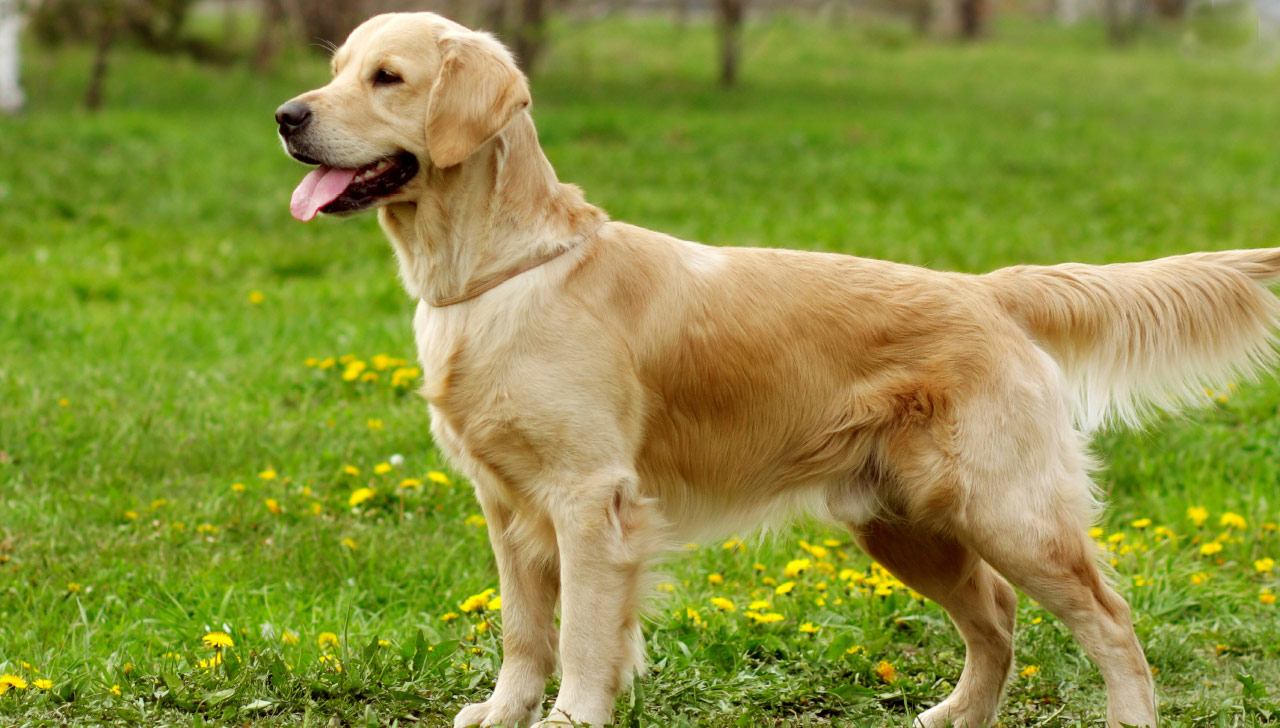

In [50]:
#Custom input

Image("C:\\Users\\groom\\Documents\\Data101\\dogs\\golden.jpg")

In [52]:
#reading the image and converting it into an np array

img_g = load_img("C:\\Users\\groom\\Documents\\Data101\\dogs\\golden.jpg",target_size = img_size)
img_g = np.expand_dims(img_g, axis=0) # as we trained our model in (row, img_height, img_width, img_rgb) format, np.expand_dims convert the image into this format
# img_g

In [53]:
img_g.shape

(1, 299, 299, 3)

In [78]:
#Extract test data features.
def extract_features(data):
    inception_features = get_features(InceptionV3, inception_preprocessor, img_size, data)
    xception_features = get_features(Xception, xception_preprocessor, img_size, data)
    inc_resnet_features = get_features(InceptionResNetV2, inc_resnet_preprocessor, img_size, data)

    final_features = np.concatenate([inception_features,
                                     xception_features,
                                     inc_resnet_features],axis=-1)
    
    print('Final feature maps shape', final_features.shape)
    
    #deleting to free up ram memory
    del inception_features
    del xception_features
    del inc_resnet_features
    gc.collect()
    
    
    return final_features

In [69]:
# #Predict test labels given test data features.
test_features = extract_features(img_g)
predg = model.predict(test_features)
print(f"Predicted label: {classes[np.argmax(predg[0])]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")

1/1 [==============================] - 53s 53s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 55s 55s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 93s 93s/step
Feature maps shape:  (1, 1536)
Final feature maps shape (1, 5632)
Predicted label: golden_retriever
Probability of prediction): 100.0 %


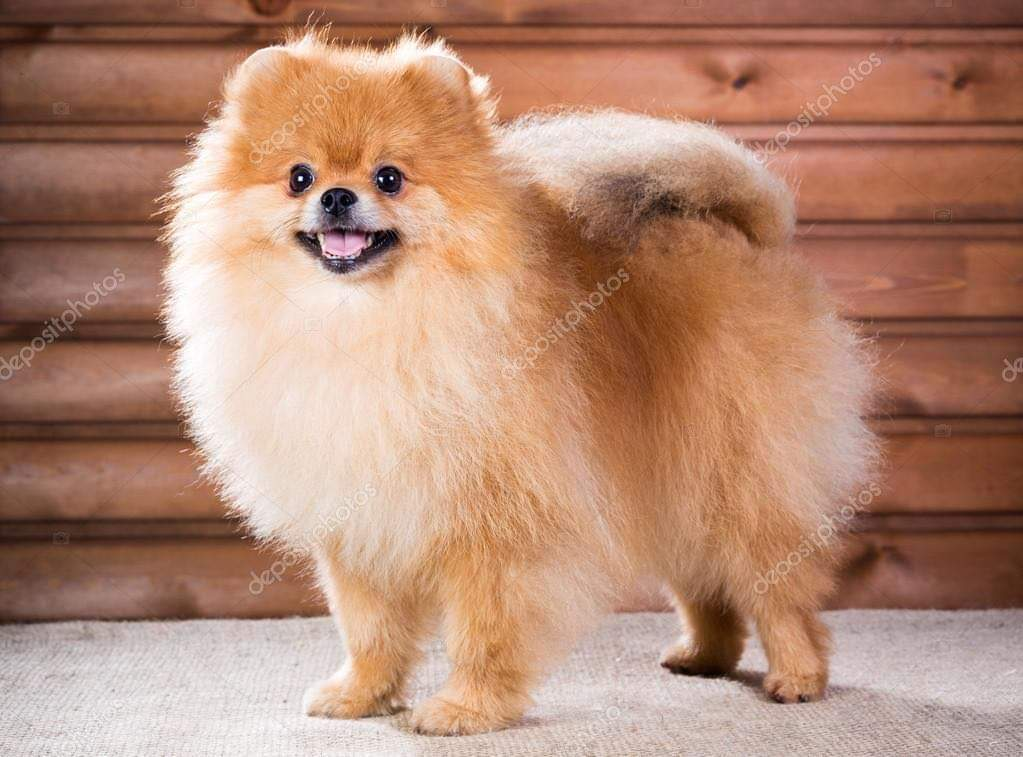

In [72]:
Image("C:\\Users\\groom\\Documents\\Data101\\dogs\\doggo.jpeg")

In [79]:
#reading the image and converting it into an np array

img_g2 = load_img("C:\\Users\\groom\\Documents\\Data101\\dogs\\doggo.jpeg",target_size = img_size)
img_g2 = np.expand_dims(img_g2, axis=0) # as we trained our model in (row, img_height, img_width, img_rgb) format, np.expand_dims convert the image into this format


In [80]:
img_g2.shape

(1, 299, 299, 3)

In [81]:
# #Predict test labels given test data features.
test_features = extract_features(img_g2)
predg = model.predict(test_features)
print(f"Predicted label: {classes[np.argmax(predg[0])]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")

1/1 [==============================] - 85s 85s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 76s 76s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 116s 116s/step
Feature maps shape:  (1, 1536)
Final feature maps shape (1, 5632)
Predicted label: pomeranian
Probability of prediction): 100.0 %


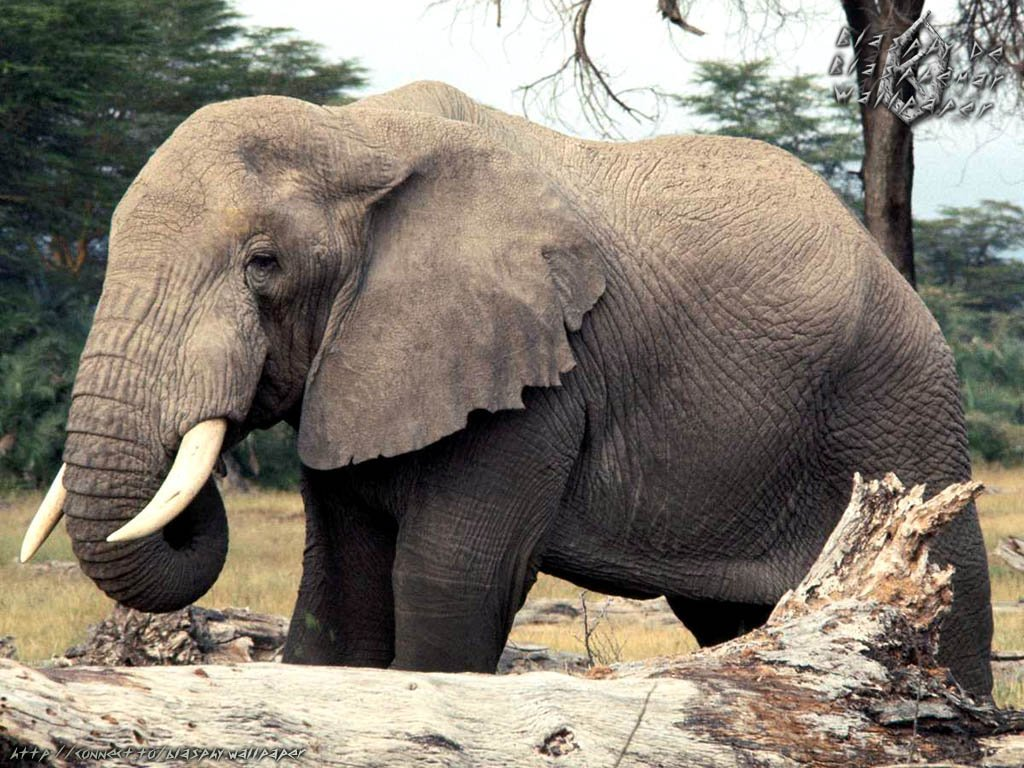

In [85]:
Image("C:\\Users\\groom\\Documents\\Data101\\dogs\\elephant.jpg")

In [86]:
#reading the image and converting it into an np array

img_g3 = load_img("C:\\Users\\groom\\Documents\\Data101\\dogs\\elephant.jpg",target_size = img_size)
img_g3 = np.expand_dims(img_g3, axis=0) # as we trained our model in (row, img_height, img_width, img_rgb) format, np.expand_dims convert the image into this format


In [87]:
img_g3.shape

(1, 299, 299, 3)

In [88]:
# #Predict test labels given test data features.
test_features = extract_features(img_g3)
predg = model.predict(test_features)
print(f"Predicted label: {classes[np.argmax(predg[0])]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")

1/1 [==============================] - 142s 142s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 139s 139s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 187s 187s/step
Feature maps shape:  (1, 1536)
Final feature maps shape (1, 5632)
Predicted label: blenheim_spaniel
Probability of prediction): 0.0 %


In [ ]:
#https://www.kaggle.com/deepakat002/inception-xception-nasnetlarge-inceptionres
#https://www.kaggle.com/phylake1337/0-18-loss-simple-feature-extractors
#https://www.kaggle.com/khanrahim/dog-breed
#https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy
#https://keras.io/api/applications/

In [89]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

In [93]:
del model

NameError: name 'model' is not defined

In [113]:
import tensorflow as tf
new_model = tf.keras.models.load_model('my_model')


OSError: Unable to open file (unable to open file: name = 'my_model', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)